# Bibliotecas

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.dates import DateFormatter

# Bases

In [2]:
base_bitcoin = pd.read_csv(r'C:\Users\yupopic\OneDrive - Daimler Truck\VSCODE\FEI\Bases\Bitcoin Historical Data.csv')
base_ethereum = pd.read_csv(r'C:\Users\yupopic\OneDrive - Daimler Truck\VSCODE\FEI\Bases\Ethereum Historical Data.csv')
base_bnb = pd.read_csv(r'C:\Users\yupopic\OneDrive - Daimler Truck\VSCODE\FEI\Bases\BNB Historical Data.csv')
base_solana = pd.read_csv(r'C:\Users\yupopic\OneDrive - Daimler Truck\VSCODE\FEI\Bases\Solana Historical Data.csv')

base_solana

,Date,Price,Open,High,Low,Vol.,Change %
0,05/17/2024,168.209,159.320,171.959,159.301,5.67M,5.59%
1,05/16/2024,159.306,158.285,164.395,156.778,6.09M,0.65%
2,05/15/2024,158.285,142.021,158.730,141.362,6.79M,11.45%
3,05/14/2024,142.023,147.395,148.949,141.927,4.73M,-3.66%
4,05/13/2024,147.411,143.417,150.564,138.008,5.92M,2.78%
...,...,...,...,...,...,...,...
1393,07/22/2020,1.046,1.004,1.087,1.003,NaN,4.17%
1394,07/21/2020,1.004,0.874,1.005,0.874,NaN,-27.41%
1395,07/15/2020,1.383,1.115,1.384,1.115,NaN,24.00%
1396,07/14/2020,1.115,1.279,1.279,1.114,NaN,-12.78%


# Tratamento de dados

In [103]:
# Converter a coluna para formato de data
for df in [base_bitcoin, base_ethereum, base_bnb, base_solana]:
    df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Puxar dados de 2023 ate o mais recente 
base_bitcoin = base_bitcoin[base_bitcoin['Date'].dt.year >= 2023]
base_ethereum = base_ethereum[base_ethereum['Date'].dt.year >= 2023]
base_bnb = base_bnb[base_bnb['Date'].dt.year >= 2023]
base_solana = base_solana[base_solana['Date'].dt.year >= 2023]

# Converter as colunas referentes a dinheiro para float
colunas_dinheiro = ['Price', 'Open', 'High', 'Low']
for df in [base_bitcoin, base_ethereum, base_bnb, base_solana]:
    for coluna in colunas_dinheiro:
        if df[coluna].dtype == 'object':  
            df[coluna] = pd.to_numeric(df[coluna].str.replace(',', ''))

# Converter a coluna 'Change %' para float
for df in [base_bitcoin, base_ethereum, base_bnb, base_solana]:
    if df['Change %'].dtype == 'object':  
        df['Change %'] = pd.to_numeric(df['Change %'].str.replace('%', ''))

# Ordenar data das bases
base_bitcoin = base_bitcoin.sort_values(by='Date')
base_ethereum = base_ethereum.sort_values(by='Date')
base_bnb = base_bnb.sort_values(by='Date')
base_solana = base_solana.sort_values(by='Date')


C:\Users\yupopic\AppData\Local\Temp\ipykernel_26772\453456351.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[coluna] = pd.to_numeric(df[coluna].str.replace(',', ''))
C:\Users\yupopic\AppData\Local\Temp\ipykernel_26772\453456351.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Change %'] = pd.to_numeric(df['Change %'].str.replace('%', ''))


In [87]:
base_bitcoin

,Date,Price,Open,High,Low,Vol.,Change %
502,2023-01-01,16618.4,16537.5,16621.9,16499.7,107.84K,0.49
501,2023-01-02,16674.3,16618.4,16766.9,16551.0,136.03K,0.34
500,2023-01-03,16674.2,16673.1,16773.2,16607.2,178.73K,0.00
499,2023-01-04,16852.1,16674.2,16976.5,16656.5,247.39K,1.07
498,2023-01-05,16829.8,16852.2,16877.9,16772.3,178.96K,-0.13
...,...,...,...,...,...,...,...
4,2024-05-13,62937.2,61480.5,63443.2,60779.0,70.55K,2.37
3,2024-05-14,61569.4,62936.8,63102.6,61156.9,68.84K,-2.17
2,2024-05-15,66225.1,61569.4,66417.1,61357.5,106.05K,7.56
1,2024-05-16,65231.0,66219.6,66643.9,64623.3,72.55K,-1.50


# Gráficos

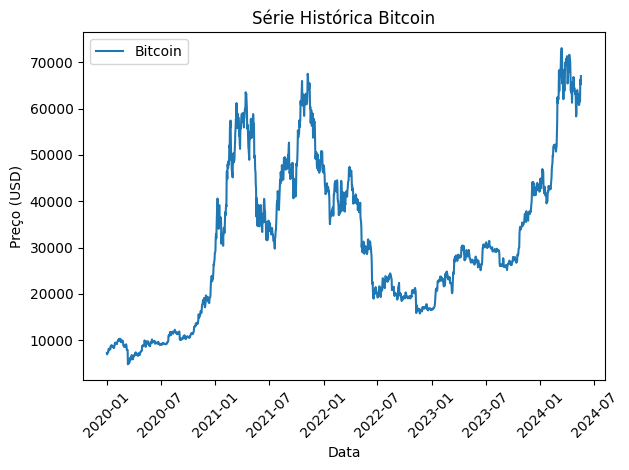

In [29]:
# Plotar os gráficos das quatro criptomoedas no mesmo gráfico
plt.plot(base_bitcoin['Date'], base_bitcoin['Price'], label='Bitcoin')

# Adicionar rótulos e título
plt.xlabel('Data')
plt.ylabel('Preço (USD)')
plt.title('Série Histórica Bitcoin')

# date_format = DateFormatter('%Y')
# plt.gca().xaxis.set_major_formatter(date_format)

plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

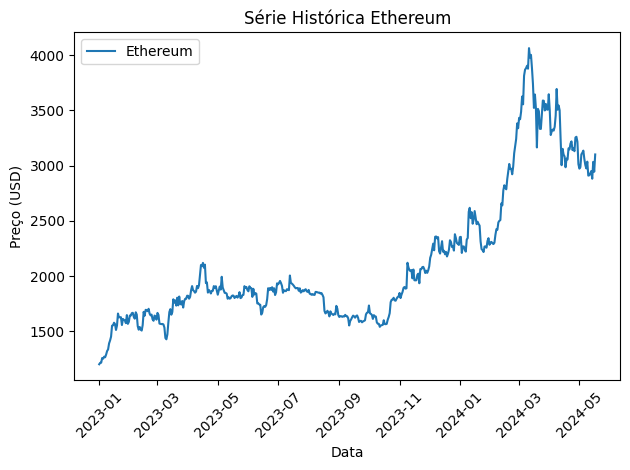

In [8]:
plt.plot(base_ethereum['Date'], base_ethereum['Price'], label='Ethereum')

# Adicionar rótulos e título
plt.xlabel('Data')
plt.ylabel('Preço (USD)')
plt.title('Série Histórica Ethereum')

# date_format = DateFormatter('%Y')
# plt.gca().xaxis.set_major_formatter(date_format)

plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

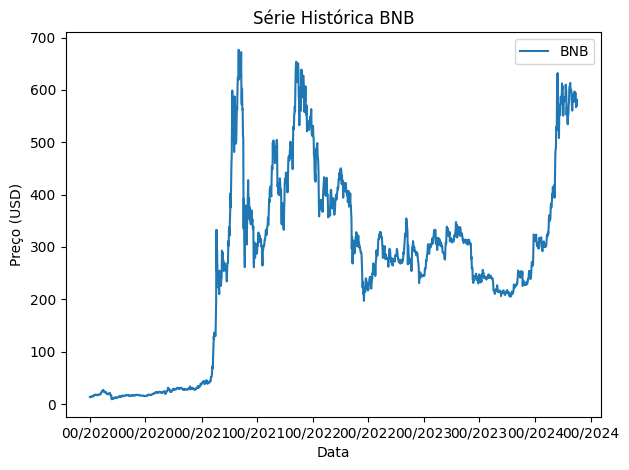

In [33]:
plt.plot(base_bnb['Date'], base_bnb['Price'], label='BNB')

# Adicionar rótulos e título
plt.xlabel('Data')
plt.ylabel('Preço (USD)')
plt.title('Série Histórica BNB')

date_format = DateFormatter('%Y')
plt.gca().xaxis.set_major_formatter(date_format)

plt.legend()
plt.tight_layout()
plt.show()

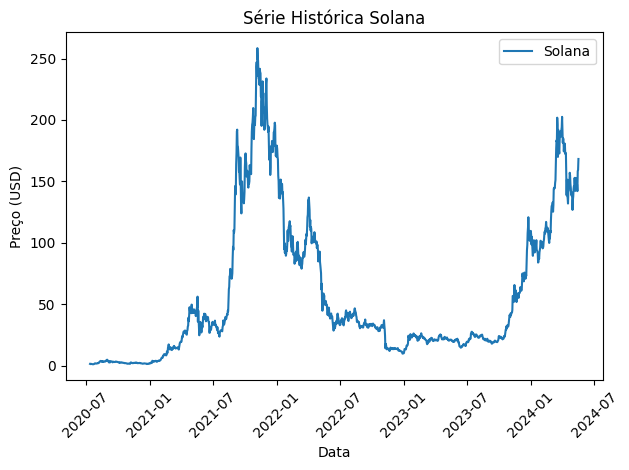

In [30]:
plt.plot(base_solana['Date'], base_solana['Price'], label='Solana')

# Adicionar rótulos e título
plt.xlabel('Data')
plt.ylabel('Preço (USD)')
plt.title('Série Histórica Solana')

# date_format = DateFormatter('%Y')
# plt.gca().xaxis.set_major_formatter(date_format)

plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

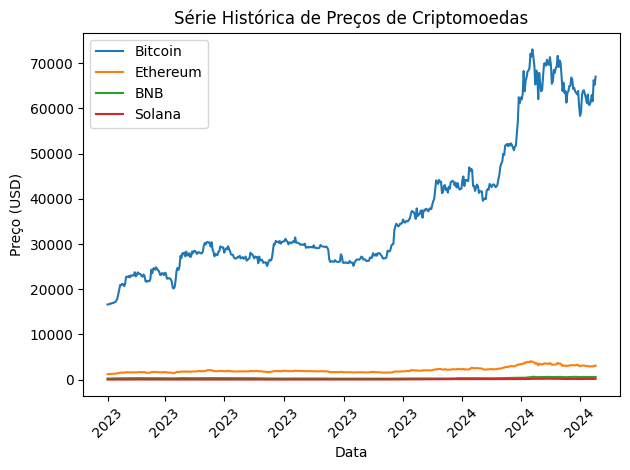

In [99]:
# Plotar os gráficos das quatro criptomoedas no mesmo gráfico
plt.plot(base_bitcoin['Date'], base_bitcoin['Price'], label='Bitcoin')
plt.plot(base_ethereum['Date'], base_ethereum['Price'], label='Ethereum')
plt.plot(base_bnb['Date'], base_bnb['Price'], label='BNB')
plt.plot(base_solana['Date'], base_solana['Price'], label='Solana')

# Adicionar rótulos e título
plt.xlabel('Data')
plt.ylabel('Preço (USD)')
plt.title('Série Histórica de Preços de Criptomoedas')

# Rotacionar os rótulos do eixo x para melhor legibilidade
plt.xticks(rotation=45)

date_format = DateFormatter('%Y')
plt.gca().xaxis.set_major_formatter(date_format)

# Adicionar legenda
plt.legend()

# Mostrar o gráfico
plt.tight_layout()
plt.show()


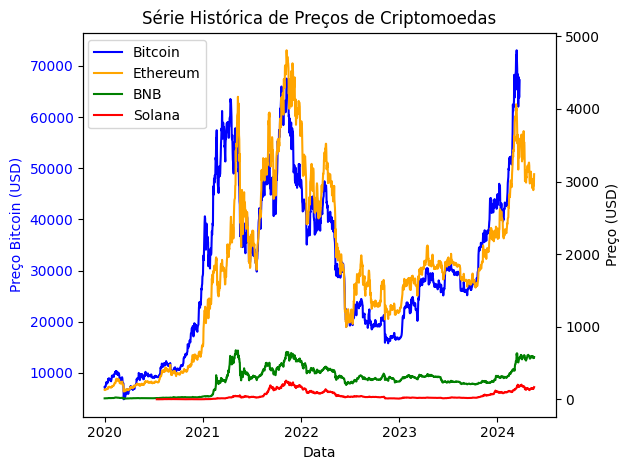

In [26]:
fig, ax1 = plt.subplots()

# Mostrar Bitcoin no eixo y principal
ax1.plot(base_bitcoin['Date'], base_bitcoin['Price'], label='Bitcoin', color='blue')
ax1.set_xlabel('Data')
ax1.set_ylabel('Preço Bitcoin (USD)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Criar um segundo eixo y que compartilha o mesmo eixo x
ax2 = ax1.twinx()

# Plotar as outras criptomoedas no segundo eixo y
ax2.plot(base_ethereum['Date'], base_ethereum['Price'], label='Ethereum', color='orange')
ax2.plot(base_bnb['Date'], base_bnb['Price'], label='BNB', color='green')
ax2.plot(base_solana['Date'], base_solana['Price'], label='Solana', color='red')
ax2.set_ylabel('Preço (USD)', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Título
plt.title('Série Histórica de Preços de Criptomoedas')

# Exibir apenas os anos no eixo X
years = pd.date_range(start=base_bitcoin['Date'].min(), end=base_bitcoin['Date'].max(), freq='YS')
ax1.set_xticks(years)
ax1.xaxis.set_major_formatter(DateFormatter('%Y'))

# Adicionar legenda
fig.legend(loc="upper left", bbox_to_anchor=(0.135, 0.92))

# Mosrar gráfico
plt.show()


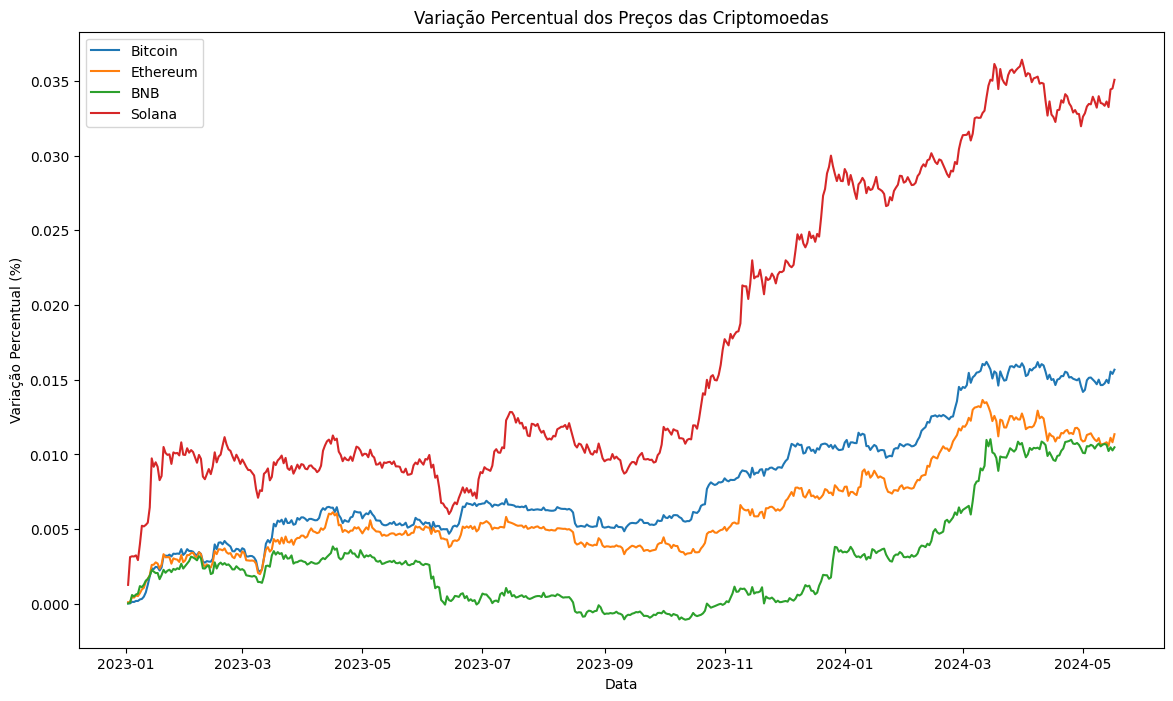

In [112]:


# Calcular a variação percentual das criptomoedas
def calcular_variacao_percentual(df, column):
    df['Price Variation %'] = (1 + df[column].pct_change() / 100).cumprod() -1
    df['Price Variation %'] = (1 + df[column].pct_change() / 100).cumprod() -1
    return df

# Aplicar a função que calcula a variação percentual com base no preço
base_bitcoin = calcular_variacao_percentual(base_bitcoin, 'Price')
base_ethereum = calcular_variacao_percentual(base_ethereum, 'Price')
base_bnb = calcular_variacao_percentual(base_bnb, 'Price')
base_solana = calcular_variacao_percentual(base_solana, 'Price')


# Gerar grafico da Variação Percentual dos Preços das Criptomoedas
plt.figure(figsize=(14, 8))
plt.plot(base_bitcoin['Date'], base_bitcoin['Price Variation %'], label='Bitcoin')
plt.plot(base_ethereum['Date'], base_ethereum['Price Variation %'], label='Ethereum')
plt.plot(base_bnb['Date'], base_bnb['Price Variation %'], label='BNB')
plt.plot(base_solana['Date'], base_solana['Price Variation %'], label='Solana')

# Dar título pro grafico e pros eixos
plt.xlabel('Data')
plt.ylabel('Variação Percentual (%)')
plt.title('Variação Percentual dos Preços das Criptomoedas')

# Colocar legenda no gráfico
plt.legend()

# Mostrar gráfico
plt.show()


In [113]:
base_bitcoin

,Date,Price,Open,High,Low,Vol.,Change %,Price Variation %
502,2023-01-01,16618.4,16537.5,16621.9,16499.7,107.84K,0.49,NaN
501,2023-01-02,16674.3,16618.4,16766.9,16551.0,136.03K,0.34,0.000034
500,2023-01-03,16674.2,16673.1,16773.2,16607.2,178.73K,0.00,0.000034
499,2023-01-04,16852.1,16674.2,16976.5,16656.5,247.39K,1.07,0.000140
498,2023-01-05,16829.8,16852.2,16877.9,16772.3,178.96K,-0.13,0.000127
...,...,...,...,...,...,...,...,...
4,2024-05-13,62937.2,61480.5,63443.2,60779.0,70.55K,2.37,0.014999
3,2024-05-14,61569.4,62936.8,63102.6,61156.9,68.84K,-2.17,0.014778
2,2024-05-15,66225.1,61569.4,66417.1,61357.5,106.05K,7.56,0.015545
1,2024-05-16,65231.0,66219.6,66643.9,64623.3,72.55K,-1.50,0.015393


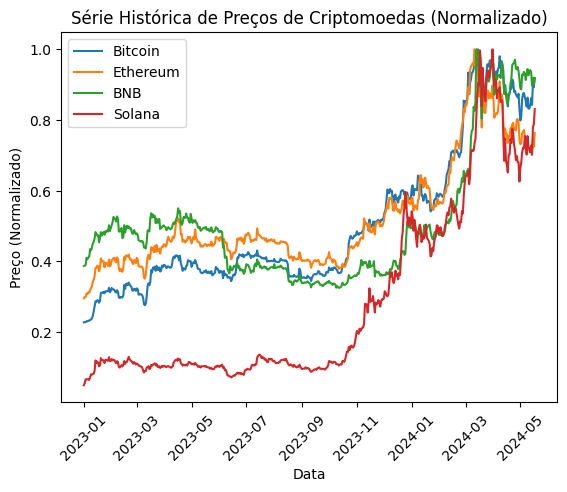

In [115]:
# Plotar os gráficos das quatro criptomoedas no mesmo gráfico
plt.plot(base_bitcoin['Date'], base_bitcoin['Price'] / base_bitcoin['Price'].max(), label='Bitcoin')
plt.plot(base_ethereum['Date'], base_ethereum['Price'] / base_ethereum['Price'].max(), label='Ethereum')
plt.plot(base_bnb['Date'], base_bnb['Price'] / base_bnb['Price'].max(), label='BNB')
plt.plot(base_solana['Date'], base_solana['Price'] / base_solana['Price'].max(), label='Solana')

# Dar título pro grafico e pros eixos
plt.xlabel('Data')
plt.ylabel('Preço (Normalizado)')
plt.title('Série Histórica de Preços de Criptomoedas (Normalizado)')

# Rotacionar os rótulos do eixo x para melhor legibilidade
plt.xticks(rotation=45)

# Colocar legenda no gráfico
plt.legend()

# Mostrar gráfico
plt.show()
